In [2]:
%matplotlib inline
notebook_screen_res = 'retina' #@param ['retina', 'png', 'jpeg', 'svg', 'pdf']
%config InlineBackend.figure_format = notebook_screen_res
%load_ext autoreload
%autoreload 2

In [4]:
from utils import *

### The Bayesian landscape
Bayesian inference problem with $N$ unknowns, we are implicitly creating an $N$ dimensional space for the prior distributions to exist in. Associated with the space is an additional dimension, which we can describe as the *surface* or *curve* that sits on top of the space, that reflects the *prior probability* of a particular point. The surface on the space is defined by our prior distributions. 

If we have two unknowns $p_1$ and $p_2$, and priors for both are `Uniform(0, 5)`, then the space created is a square of length 5 and the surface is a flat plane that sits on top of the square (representing that every point is equally likely).

<Figure size 900x432 with 0 Axes>

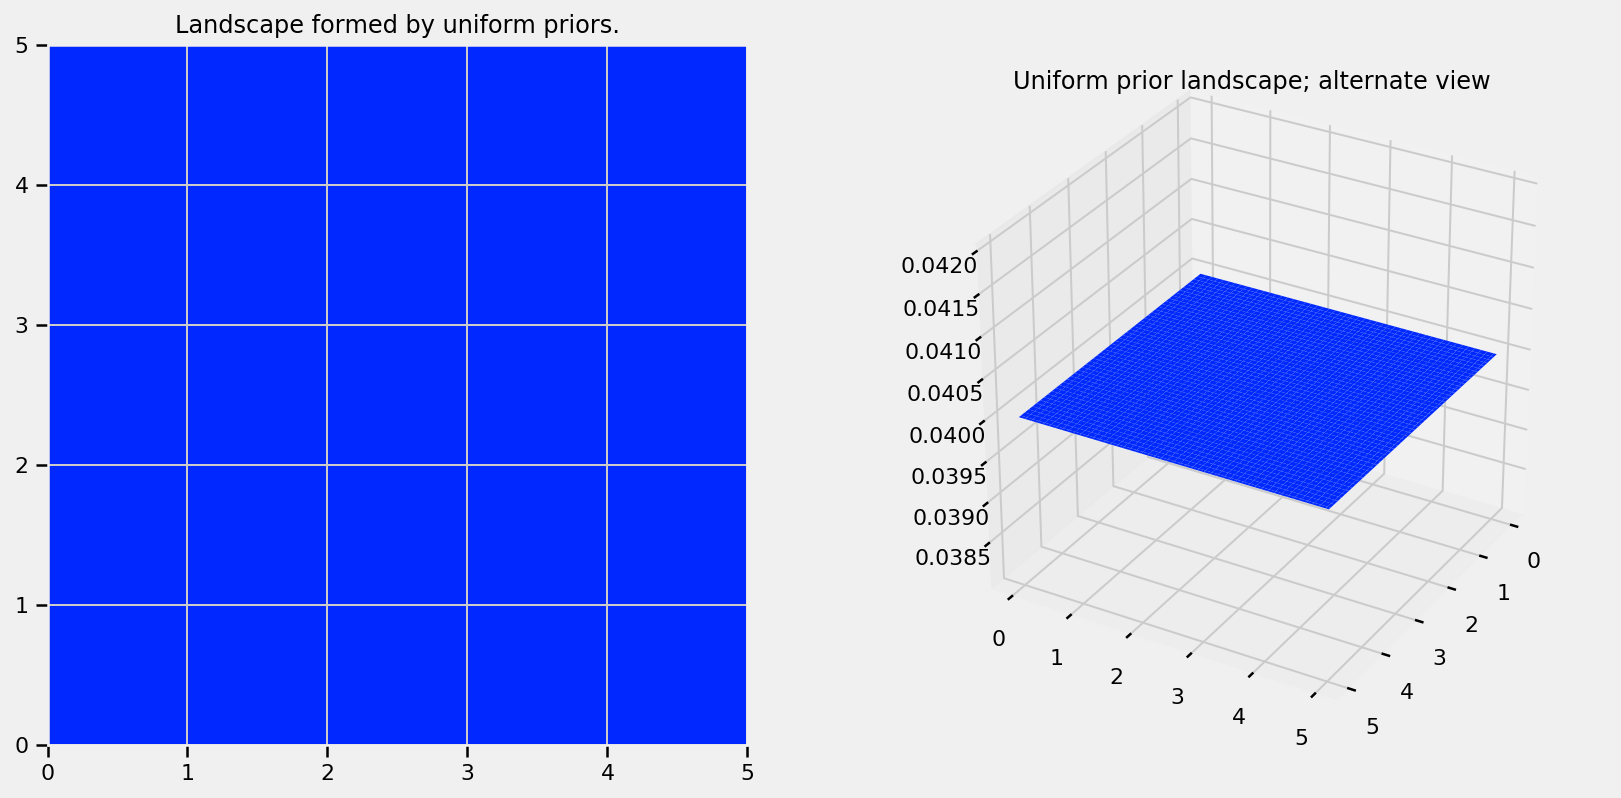

In [5]:
warnings.filterwarnings('ignore', category=DeprecationWarning)
x_ = y_ = np.linspace(0., 5., 100., dtype=np.float32)
X_, Y_ = evaluate(tf.meshgrid(x_, y_))
uni_x_ = evaluate(tfd.Uniform(low=0., high=5.).prob(x_))
m = np.median(uni_x_[uni_x_ > 0])
uni_x_[uni_x_ == 0] = m
uni_y_ = evaluate(tfd.Uniform(low=0., high=5.).prob(y_))
m = np.median(uni_y_[uni_y_ > 0])
uni_y_[uni_y_ == 0] = m
M_ = evaluate(tf.matmul(tf.expand_dims(uni_x_, 1), tf.expand_dims(uni_y_, 0)))

plt.figure(figsize(12.5, 6))
jet = plt.cm.jet
fig = plt.figure()
plt.subplot(121)

im = plt.imshow(M_, interpolation='none', origin='lower',
               cmap=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title('Landscape formed by uniform priors.')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X_, Y_, M_, cmap=plt.cm.jet, vmax=1, vmin=-.15)
ax.view_init(azim=390)
plt.title('Uniform prior landscape; alternate view');

Alternatively, if the two priors are `Exp(3)` and `Exp(10)`, then the space is all positive numbers on the 2-D plane, and the surface induced by the priors looks like a water fall that starts at point `(0, 0)` and flows over the positive numbers.

The plots below visualize this. The more `dark red` the color, the more prior probability is assigned to that location. Conversely, areas with dark blue represent that our priors assign very low probability to that location.

<Figure size 900x432 with 0 Axes>

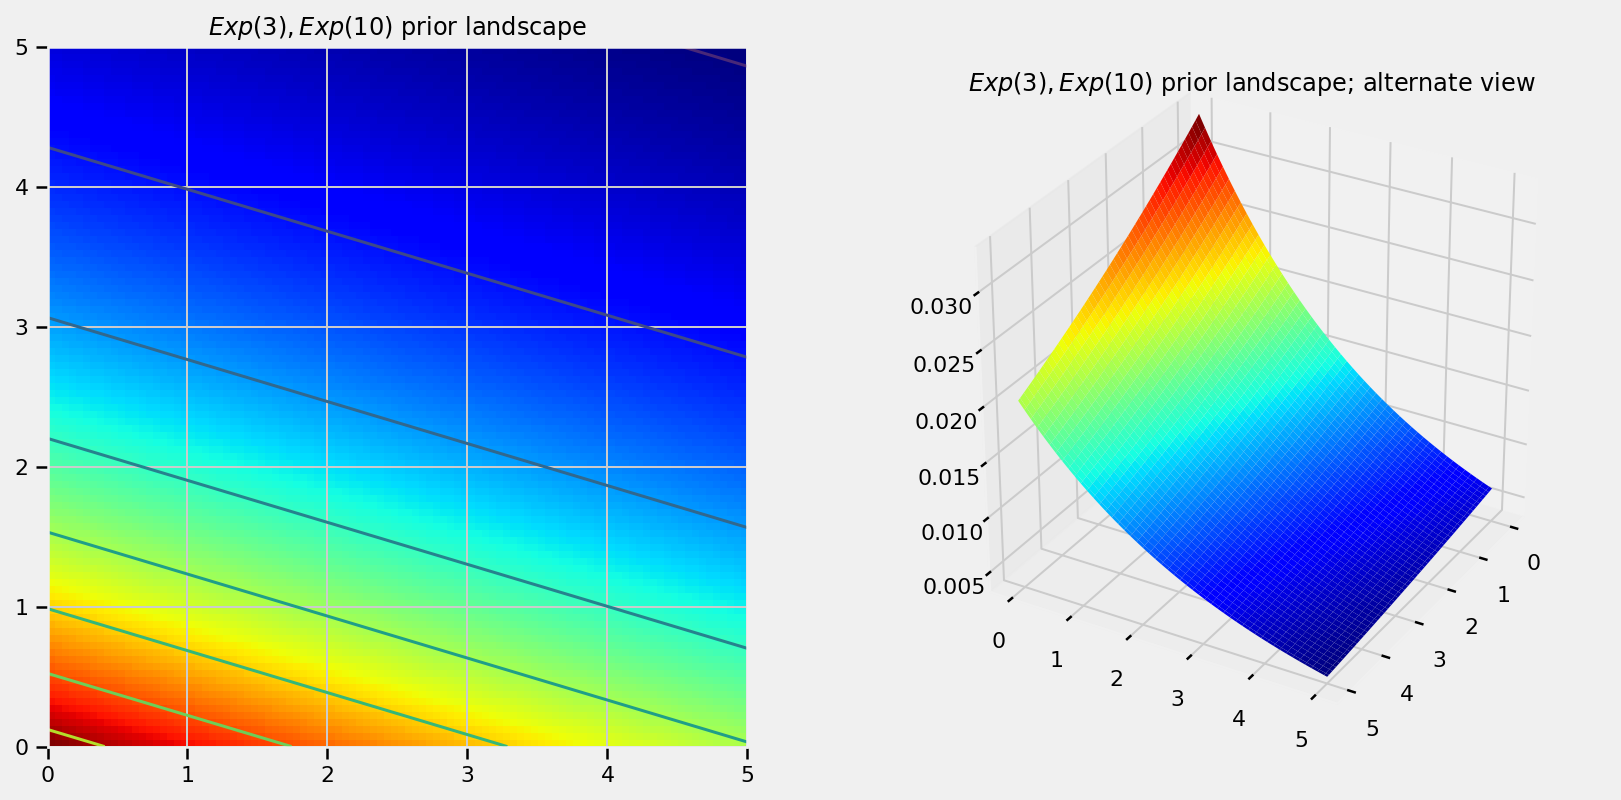

In [7]:
exp_x_ = evaluate(tfd.Exponential(rate=(1./3.)).prob(x_))
exp_x_[np.isnan(exp_x_)] = exp_x_[1]
exp_y_ = evaluate(tfd.Exponential(rate=(1./10.)).prob(x_))
exp_y_[np.isnan(exp_y_)] = exp_y_[1]
M_ = evaluate(tf.matmul(tf.expand_dims(exp_x_, 1), tf.expand_dims(exp_y_, 0)))

plt.figure(figsize=(12.5, 6))
fig = plt.figure()
jet = plt.cm.jet
plt.subplot(121)
CS = plt.contour(X_, Y_, M_)
im = plt.imshow(M_, interpolation='none', origin='lower', cmap=jet, extent=(0, 5, 0, 5))
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title(r'$Exp(3), Exp(10)$ prior landscape')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X_, Y_, M_, cmap=plt.cm.jet)
ax.view_init(azim=30)
plt.title(r"$Exp(3), Exp(10)$ prior landscape; alternate view");

In [8]:
# creating the observed data
# sample size of data we observe, trying varying this (keep it less than 100 ;)
N = 1 # param {type: "slider", min:1, max:15, step:1}

# The true parameters, but of course we do not see these values...
lambda_1_true = float(1.)
lambda_2_true = float(3.)

#...we see the data generated, dependent on the above two values.
data = tf.concat([
    tfd.Poisson(rate=lambda_1_true).sample(sample_shape=(N, 1), seed=4),
    tfd.Poisson(rate=lambda_2_true).sample(sample_shape=(N, 1), seed=8)
], axis=1)
data_ = evaluate(data)
print("observed (2-dimensional, sample size=%d): \n" % N, data_)

# Plotting details.
x_ = y_ = np.linspace(0.01, 5, 100)
likelihood_x_ = evaluate(tfd.Poisson(rate=x_).prob(data_[:, 0]))
likelihood_y_ = evaluate(tfd.Poisson(rate=y_).prob(data_[:, 1]))
L_ = evaluate(tf.matmul(tf.expand_dims(likelihood_x_, 1),
                        tf.expand_dims(likelihood_y_, 0)))

observed (2-dimensional, sample size=1): 
 [[3. 4.]]


In [ ]:
def plot_prior(dist_prob, lambda_1_true, lambda_2_true, title=None):
    prior_x_ = evaluate(dist_prob)
    m = np.median(prior_x_[prior_x_ > 0])
    prior_x_[prior_x_ == 0] = m
    prior_y_ = evaluate(dist_prob)
    m = np.median(prior_y_[prior_y_ > 0])
    prior_y_[prior_y_ == 0] = m
    M_ = evluate(tf.matmul(tf.expand_dims(prior_x_, 1), tf.expand_dims(prior_y_, 0)))
    
    im = plt.imshow(M_, interpolation='none', origin='lower',
                   cmap=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))
    plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edcolor='none')
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    plt.title(r"Landscape formed by ")

In [ ]:
plt.figure(figsize=(12.5, 15.0))

plt.subplot(221)
uni_x_ = evaluate(tfd.Uniform(low=0., high=5.).prob(tf.to_float(x_)))
m = np.median(uni_x_[uni_x_ > 0])
uni_x_[uni_x_ == 0] = m
uni_y_ = evaluate(tfd.Uniform(low=0., high=5.).prob(tf.to_float(y_)))
m = np.median(uni_y_[uni_y_ > 0])
uni_y_[uni_y_ == 0] = m
M_ = evaluate(tf.matmul(tf.expand_dims(uni_x_, 1), tf.expand_dims(uni_y_, 0)))

im = plt.imshow(M_, interpolation='none', origin='lower', 
               camp=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))
plt.scatter(lambda_2_true, lambda_1_true, c="k",s=50, edgecolor="none")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title(r"Landscape formed by Uniform priors on $p_1, p_2")